In [ ]:
!export RASPA_DIR="/opt/tljh/user/pkgs/raspa2-2.0.45-h6712644_0" && cd RASPA2/examples/BookChapter/3-PoreSizeDistribution/ && ../../../../shared/RASPA_DIR/bin/simulate

In [ ]:
!git clone https://github.com/iRASPA/RASPA2.git

In [ ]:
!cd RASPA2
!pwd

In [ ]:
for dd in ['zeoout/' + i.split(' ')[0][1:] + '_' + i.split(' ')[1] + '/' for i in params]:
    for i in dirs:
        os.makedirs(dd + i, exist_ok=True)

In [ ]:
def cmds(fname):
    result_l = []
    for i in params:
        prefixes = i.split(' ')[:2]
        filetype = prefixes[0][1:]
        dir_name = filetype + '_' + prefixes[1]
        full_cmd = './shared/zeopp/network ' + i + (' zeoout/%s/%s.%s %s' % (dir_name, fname, filetype, fname))
        result_l.append(full_cmd)
    return result_l

In [ ]:

for i in np.arange(0.25, 3.001, 0.25):
    for pref in ['vol', 'volpo', 'sa']:
        params.append('-%s %.2f %.2f 10000' % (pref, i, i))

In [ ]:
import multiprocessing
import subprocess
import shlex

from multiprocessing.pool import ThreadPool

def call_proc(cmd):
    """ This runs in a separate thread. """
    #subprocess.call(shlex.split(cmd))  # This will block until cmd finishes
    p = subprocess.Popen(shlex.split(cmd), stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    out, err = p.communicate()
    return (out, err)


pool = ThreadPool(multiprocessing.cpu_count())
for fname in dataset_list:
    for cmd in cmds(fname):
        pool.apply_async(call_proc, (cmd,))

# Close the pool and wait for each running task to complete
pool.close()
pool.join()

#subprocess.call("shared/zeopp/network -ha -psd 0.1 0.1 100000 ")

In [ ]:
!/opt/tljh/user/pkgs/raspa2-2.0.45-h6712644_0/bin/simulate

In [ ]:
!export RASPA_DIR="/opt/tljh/user/pkgs/raspa2-2.0.45-h6712644_0"

In [ ]:
!du -a zeoout | cut -d/ -f2 | sort | uniq -c | sort -nr

In [ ]:
import numpy as np

In [ ]:
#aa = np.genfromtxt('zeoout/psd_0.25/tmlcc_dataset/mof_cif_train/mof_unit_1797.cif.psd', skip_header=12)

In [ ]:
ab = np.genfromtxt('zeoout/chan_1.50/tmlcc_dataset/mof_cif_train/mof_unit_1797.cif.chan', skip_header=12)
aa = np.genfromtxt('zeoout/ray_atom_1.50/tmlcc_dataset/mof_cif_train/mof_unit_1797.cif.chan', skip_header=1)

In [ ]:
plt.plot(aa*20)
plt.plot(ab[:, 1])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!cat zeoout/vol_0.25/tmlcc_dataset/mof_cif_train/mof_unit_1797.cif.vol

In [ ]:
!cat zeooutb/vol_1.50/tmlcc_dataset/mof_cif_train/mof_unit_1797.cif.vol

In [ ]:
!cat zeooutb/vol_1.25/tmlcc_dataset/mof_cif_train/mof_unit_1797.cif.vol

In [ ]:
!cat zeooutb/volpo_1.50/tmlcc_dataset/mof_cif_train/mof_unit_1797.cif.volpo

In [ ]:
!cat zeooutb/volpo_0.25/tmlcc_dataset/mof_cif_train/mof_unit_1797.cif.volpo

In [ ]:
!cat zeooutb/sa_0.25/tmlcc_dataset/mof_cif_train/mof_unit_1797.cif.sa

In [ ]:
!cat zeooutb/sa_1.25/tmlcc_dataset/mof_cif_train/mof_unit_1797.cif.sa

In [ ]:
!cat zeooutb/sa_1.50/tmlcc_dataset/mof_cif_train/mof_unit_1797.cif.sa

In [ ]:
!cat zeooutb/chan_1.50/tmlcc_dataset/mof_cif_train/mof_unit_1797.cif.chan

In [198]:
len(features)

221

In [229]:
extract_all('mof_cif_train', 'mof_unit_14')

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.48916000e+00,
        2.38252000e+00,  5.44992000e+00,  2.25433000e+00,  2.38252000e+00,
        2.23275000e+00,  5.48916000e+00,  5.44992000e+00,  5.21393000e+00,
        1.07162000e+03,  1.08723000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.01264000e+02,  9.44965000e+02,  8.69153000e+02,
        0.00000000e+00,  2.00000000e+00,  1.07162000e+03,  1.08723000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.95767000e+01,
        2.76000000e-02,  2.53857000e-02,  0.00000000e+00,  2.00000000e+00,
        1.07162000e+03,  1.08723000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.81407000e+02,  2.62600000e-01,  2.41532000e-01,
        1.08723000e+00,  1.65000000e+00,  5.00000000e+03,  0.00000000e+00,
        2.76000000e-02,  0.00000000e+00,  2.62600000e-01,  2.88400000e-01,
        4.49000000e-01, -

In [220]:
extract_spectra('spect/tmlcc_dataset/mof_cif_train/mof_unit_14.cif.npy').shape

(168,)

In [134]:
np.isnan(extract_psd('zeoout/psd_1.65/tmlcc_dataset/mof_cif_train/mof_unit_14.cif.psd'))

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


array([False, False,  True])

In [145]:
extract_ray_atom('zeoout/ray_atom_1.65/tmlcc_dataset/mof_cif_train/mof_unit_14.cif.ray_atom')

array([0, 0])

In [105]:
packs

NameError: name 'packs' is not defined

In [138]:
!cat zeoout/resex/tmlcc_dataset/mof_cif_train/mof_unit_14.cif.resex

zeoout/resex/tmlcc_dataset/mof_cif_train/mof_unit_14.cif.resex    5.48916 2.38252  5.44992  2.25433  2.38252  2.23275  5.48916  5.44992  5.21393  


In [149]:
extract_psd('zeoout/psd_1.65/tmlcc_dataset/mof_cif_train/mof_unit_38.cif.psd')

array([0, 0, 0])

In [92]:
extract_resex('zeoout/resex/tmlcc_dataset/mof_cif_train/mof_unit_14.cif')

array([5.48916, 2.38252, 5.44992, 2.25433, 2.38252, 2.23275, 5.48916,
       5.44992, 5.21393])

In [68]:
extract_ray_atom('zeoout/ray_atom_1.65/tmlcc_dataset/mof_cif_train/mof_unit_10.cif')

5.489683935877915

In [150]:
!cat zeoout/volpo_1.65/tmlcc_dataset/mof_cif_train/mof_unit_38.cif.volpo

@ zeoout/volpo_1.65/tmlcc_dataset/mof_cif_train/mof_unit_38.cif.volpo Unitcell_volume: 810.133   Density: 1.41759   POAV_A^3: 0 POAV_Volume_fraction: 0 POAV_cm^3/g: 0 PONAV_A^3: 93.1653 PONAV_Volume_fraction: 0.115 PONAV_cm^3/g: 0.0811237
PROBE_OCCUPIABLE_VOL_CALC: filename| density(g/cm3)| probe rad| N points| probe ctr A fract| probe ctr NA fract| A fract| NA fract| narrow fract |ovlp fract.
PROBE_OCCUPIABLE___RESULT: zeoout/volpo_1.65/tmlcc_dataset/mof_cif_train/mof_unit_38.cif.volpo	1.41759	1.65	5000	0	0.0058	0	0.115	0.3046	0.5804


In [152]:
!cat zeoout/volpo_1.65/tmlcc_dataset/mof_cif_train/mof_unit_119.cif.volpo

@ zeoout/volpo_1.65/tmlcc_dataset/mof_cif_train/mof_unit_119.cif.volpo Unitcell_volume: 2421.1   Density: 0.732295   POAV_A^3: 1273.5 POAV_Volume_fraction: 0.526 POAV_cm^3/g: 0.71829 PONAV_A^3: 0 PONAV_Volume_fraction: 0 PONAV_cm^3/g: 0
PROBE_OCCUPIABLE_VOL_CALC: filename| density(g/cm3)| probe rad| N points| probe ctr A fract| probe ctr NA fract| A fract| NA fract| narrow fract |ovlp fract.
PROBE_OCCUPIABLE___RESULT: zeoout/volpo_1.65/tmlcc_dataset/mof_cif_train/mof_unit_119.cif.volpo	0.732295	1.65	5000	0.1944	0	0.526	0	0.1582	0.3158


In [179]:
extract_volpo('zeoout/volpo_1.65/tmlcc_dataset/mof_cif_train/mof_unit_14.cif.volpo')

array([1.07162e+03, 1.08723e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       2.81407e+02, 2.62600e-01, 2.41532e-01, 1.08723e+00, 1.65000e+00,
       5.00000e+03, 0.00000e+00, 2.76000e-02, 0.00000e+00, 2.62600e-01,
       2.88400e-01, 4.49000e-01])

In [167]:
extract_sa_vol('zeoout/vol_1.65/tmlcc_dataset/mof_cif_train/mof_unit_119.cif.vol')

array([2.42110e+03, 7.32295e-01, 4.70661e+02, 1.94400e-01, 2.65467e-01,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00])

In [168]:
extract_sa_vol('zeoout/sa_1.65/tmlcc_dataset/mof_cif_train/mof_unit_119.cif.sa')

array([2.42110e+03, 7.32295e-01, 4.74767e+02, 1.96096e+03, 2.67783e+03,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00])

In [147]:
!cat zeoout/vol_1.65/tmlcc_dataset/mof_cif_train/mof_unit_14.cif.vol

@ zeoout/vol_1.65/tmlcc_dataset/mof_cif_train/mof_unit_14.cif.vol Unitcell_volume: 1071.62   Density: 1.08723   AV_A^3: 0 AV_Volume_fraction: 0 AV_cm^3/g: 0 NAV_A^3: 29.5767 NAV_Volume_fraction: 0.0276 NAV_cm^3/g: 0.0253857
Number_of_channels: 0 Channel_volume_A^3: 
Number_of_pockets: 2 Pocket_volume_A^3: 29.1481  0.428648  


In [146]:
!cat zeoout/sa_1.65/tmlcc_dataset/mof_cif_train/mof_unit_14.cif.sa

@ zeoout/sa_1.65/tmlcc_dataset/mof_cif_train/mof_unit_14.cif.sa Unitcell_volume: 1071.62   Density: 1.08723   ASA_A^2: 0 ASA_m^2/cm^3: 0 ASA_m^2/g: 0 NASA_A^2: 101.264 NASA_m^2/cm^3: 944.965 NASA_m^2/g: 869.153
Number_of_channels: 0 Channel_surface_area_A^2: 
Number_of_pockets: 2 Pocket_surface_area_A^2: 95.2443  6.02  


In [251]:
!du -a zeoout | cut -d/ -f2 | sort | uniq -c | sort -nr

  70617 volpo_1.65
  70617 vol_1.65
  70617 sa_1.65
  70617 resex
  70617 ray_atom_1.65
  70617 psd_1.65
  70617 chan_1.65
      1 2609616	zeoout


In [ ]:
25 11
   1312 resex
   1312 ray_atom_1.65
   1312 psd_1.65
   1308 chan_1.65
   1293 volpo_1.65
   1293 vol_1.65
   1292 sa_1.65
      1 48092	zeoout
        
2802
         1441 resex
   1441 ray_atom_1.65
   1440 psd_1.65
   1439 chan_1.65
   1424 volpo_1.65
   1424 vol_1.65
   1422 sa_1.65

In [ ]:
atoms.get_potential_energy()

In [2]:
from ase.io import read
from gemmi import cif
from collections import Counter
from glob import glob
import multiprocessing
import pickle

In [5]:
dset = glob('tmlcc_dataset/*/*.cif')

In [11]:
with open('result1.pkl', 'rb') as fp:
    abcde = pickle.load(fp)

In [16]:
e1 = Counter()
b1 = Counter()
for ela in abcde:
    e1 += ela[1]
    b1 += ela[2]

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('atom_props.csv')

/opt/tljh/user/lib/python3.7/site-packages/ase/io/cif.py:404: UserWarning: crystal system 'triclinic' is not interpreted for space group 1. This may result in wrong setting!
  setting_name, spacegroup))


In [27]:
len(df)

47

In [34]:
df = pd.read_csv('atom_props.csv')
props = dict()
types = df['type'].to_list()
for k in df.keys():
    if k == 'type': continue
    props[k] = dict()
    vals = df[k].to_list()
    for i in range(len(types)):
        for j in range(len(types)):
            props[k][(types[i], types[j])] = vals[i] * vals[j]
with open('props.pkl', 'wb') as fp:
    pickle.dump(props, fp)

In [ ]:
props == properties of atomic key pair

In [66]:
from sklearn.utils.extmath import cartesian

In [ ]:
chem_len

In [104]:
import matplotlib.pyplot as plt

In [ ]:
with open('props.pkl', 'rb') as fp:
    props = pickle.load(fp)

In [ ]:

for B in [10, 50, 100, 500]:
    for k in prop_mat:
        for R in np.linspace(0.25, 30, 2000):
            prelim_result = np.sum(mask*prop_mat[k]*np.exp(-B*np.power((R - dist_mat_mic), 2)))
            for kdiv, div in [('1', 1), ('n', chem_len), ('n^2-n', chem_len * (chem_len - 1))]:

In [146]:
all_spect = dict()
for mic_c in [True, False]: # minimum image convention
    for k in prop_mat: # 7
        for kdiv, div in [('1', 1), ('n', chem_len), ('n^2-n', chem_len * (chem_len - 1))]: # 3
            key = 'mic=%s-%s-div=%s' % (mic_c, k, kdiv) # 42
            all_spect[key] = np.zeros((60000, 200))

In [137]:
filelist = glob('tmlcc_dataset/mof_cif_train/*.cif')[:59500] + glob('tmlcc_dataset/mof_cif_pretest/*.cif')[:500]

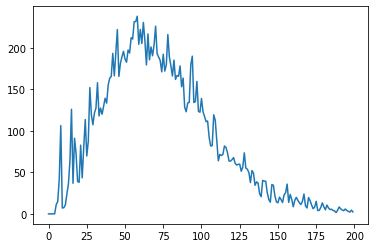

In [166]:
plt.plot()

In [163]:
(dist_mat - R).shape

(200, 208, 208)

In [170]:
len(prop_mat_masked)

7

In [187]:
np.stack([np.ones((2, 2)), np.ones((2, 2))*4, np.eye(2, 2)])

array([[[1., 1.],
        [1., 1.]],

       [[4., 4.],
        [4., 4.]],

       [[1., 0.],
        [0., 1.]]])

In [173]:
R = np.linspace(0.25, 30, 200).reshape(-1, 1, 1)
def process_spect(f):
    atoms = read(filelist[f])
    chem_len = len(atoms.get_chemical_symbols())
    mask = 1 - np.tril(np.ones(chem_len))
    symbols = atoms.get_chemical_symbols()
    prop_mat_masked = {k: mask * np.array([
        props[k][i] for i in itertools.product(symbols, symbols)
    ]).reshape(chem_len, chem_len) for k in props}
    B = 100
    prop_mat_masked_keys = sorted(prop_mat_masked)
    spect_b = np.zeros((42, 200))
    ii = 0
    for mic_op in [True, False]: # minimum image convention
        dist_mat = atoms.get_all_distances(mic=mic_op)
        mult = np.exp(-B*np.power((dist_mat - R), 2))
        for k in prop_mat_masked_keys: # 7
            spect = np.sum(prop_mat_masked[k] * mult, (1, 2))
            for div in [1, chem_len, chem_len * (chem_len - 1)]:
                spect_b[ii, :] = spect / div # 42 spect of 200 -> 42*4 pca features
                ii += 1
    return spect_b

0
1
2
3
4
5
6
7
8
9
10
11
12


KeyboardInterrupt: 

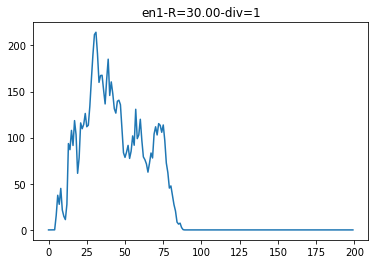

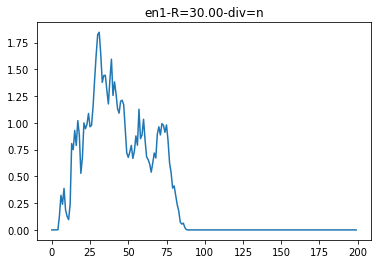

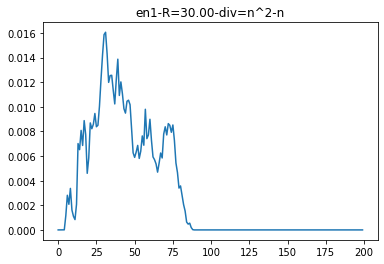

In [130]:
atoms = read('tmlcc_dataset/mof_cif_train/mof_unit_1798.cif')
dist_mat_mic = atoms.get_all_distances(mic=True) # minimum image convention
dist_mat_nmic = atoms.get_all_distances(mic=False)
chem_len = len(atoms.get_chemical_symbols())
mask = 1 - np.tril(np.ones(chem_len))
symbols = atoms.get_chemical_symbols()
prop_mat = {k: np.array([
    props[k][i] for i in itertools.product(symbols, symbols)
]).reshape(chem_len, chem_len) for k in props}

B = 100
for k in prop_mat:
    for kdiv, div in [('1', 1), ('n', chem_len), ('n^2-n', chem_len * (chem_len - 1))]:
        
        aa = []
        for R in np.linspace(0.25, 30, 200):
            prelim_result = np.sum(mask*prop_mat[k]*np.exp(-B*np.power((R - dist_mat_mic), 2)))
            key = '%s-R=%.2f-div=%s' % (k, R, kdiv)
            aa.append(prelim_result / div)
        plt.figure()
        plt.plot(aa)
        plt.title(key)
    break


array([[3.68085585e-272, 1.29082567e-303, 7.41603977e-061, ...,
        4.48651760e-244, 8.39059801e-052, 9.74656291e-281],
       [1.29082567e-303, 3.68085585e-272, 7.71888490e-001, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [7.41603977e-061, 7.71888490e-001, 3.68085585e-272, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [4.48651760e-244, 0.00000000e+000, 0.00000000e+000, ...,
        3.68085585e-272, 4.79215242e-022, 2.17909900e-020],
       [8.39059801e-052, 0.00000000e+000, 0.00000000e+000, ...,
        4.79215242e-022, 3.68085585e-272, 5.79704399e-024],
       [9.74656291e-281, 0.00000000e+000, 0.00000000e+000, ...,
        2.17909900e-020, 5.79704399e-024, 3.68085585e-272]])

In [59]:
import numpy as np

In [55]:
import itertools

In [54]:
atoms.get_all_distances(mic=True)

array([[0.        , 5.14088622, 3.67666497, ..., 4.8671284 , 3.58446905,
        5.03919179],
       [5.14088622, 0.        , 2.44911629, ..., 5.67567496, 5.9316057 ,
        7.20432347],
       [3.67666497, 2.44911629, 0.        , ..., 6.83421272, 5.35684839,
        5.96652015],
       ...,
       [4.8671284 , 5.67567496, 6.83421272, ..., 0.        , 1.79935821,
        1.82714942],
       [3.58446905, 5.9316057 , 5.35684839, ..., 1.79935821, 0.        ,
        1.76853097],
       [5.03919179, 7.20432347, 5.96652015, ..., 1.82714942, 1.76853097,
        0.        ]])

In [26]:
df

type      en1  vdw_vol1      hard        pol       en2  vdw_vol2       mass
0    Ag  0.66545   1.03547  0.627287   4.867257  0.730769  1.884999   8.908750
1    Al  0.62182   1.26796  0.555436   5.115044  0.576923  1.884999   2.248500
2    As  1.02545   1.28863  0.899791   2.654867  0.769231  1.753537   6.243500
3     B  0.82909   1.44064  0.801998   1.814159  0.769231  1.187055   0.917417
4    Ba  0.24873   1.79412  0.506845  24.070800  0.346154  4.006310  11.492080
5    Be  0.65818   0.72900  0.932398   3.336283  0.576923  1.396092   0.751000
6    Br  1.17091   1.28863  0.845221   1.858407  1.096154  1.396092   6.576500
7     C  1.00000   1.00000  1.000000   1.000000  1.000000  1.000000   1.000000
8    Ca  0.34545   2.50893  0.608975  14.247790  0.384615  2.813759   3.330250
9    Cd  0.72000   0.80272  0.899491   4.070796  0.653846  2.167311   9.492000
10   Cl  1.26545   1.09086  0.935626   1.292035  1.211538  1.187055   2.914083
11   Co  0.93091   1.44064  0.719823   4.867257  0.692308  1.628333   4.911083
12   Cr  0.60364   1.37416  0.609145   7.345133  0.615385  1.753537   4.328417
13   Cu  0.72000   0.55831  0.649160   4.159292  0.730769  1.628333   5.244167
14    F  1.45455   0.64674  1.402379   0.330973  1.500000  0.686953   1.583167
15   Fe  0.80000   1.48614  0.772064   5.486726  0.692308  1.753537   4.661250
16   Ga  0.88000   1.33090  0.559019   4.424779  0.615385  1.884999   5.743833
17   Ge  0.95273   1.91206  0.666771   3.539823  0.730769  1.884999   6.160167
18    H  0.94182   0.26336  1.284652   0.398230  0.846154  0.351720   0.084000
19    I  1.01091   1.58017  0.739353   2.911504  1.019231  1.884999  10.575000
20   In  0.77818   1.46307  0.538314   5.752212  0.653846  2.167311   9.575333
21    K  0.16364   4.23275  0.384035  25.663720  0.307692  4.468146   3.247000
22   Li  0.32364   1.22692  0.477497  14.513270  0.384615  2.167311   0.584667
23   Mg  0.48000   1.05394  0.764762   6.300885  0.461538  2.167311   1.998750
24   Mn  0.80000   1.55615  0.743658   6.017699  0.576923  1.753537   4.578167
25   Mo  0.41818   1.85820  0.635315   7.699115  0.692308  1.884999   8.158833
26    N  1.16000   0.75802  1.460710   0.654867  1.173077  0.833706   1.166917
27   Na  0.20364   2.38095  0.459205  14.424780  0.346154  2.813759   1.915833
28   Nb  0.51636   1.80536  0.598827   8.672566  0.615385  2.022873   7.742167
29   Ni  0.70545   0.88144  0.647921   4.336283  0.692308  1.628333   4.827917
30    O  1.32727   0.71477  1.215948   0.469027  1.346154  0.757964   1.332917
31    P  0.91636   1.18707  0.971356   2.212389  0.826923  1.509236   2.581167
32   Pd  0.80000   0.88144  0.777951   2.309735  0.846154  1.753537   8.825250
33   Rb  0.11273   5.66215  0.369186  28.318580  0.307692  4.964177   7.076000
34    S  1.07636   1.18707  0.828466   1.716814  1.000000  1.187055   2.664333
35   Sb  0.89455   1.77932  0.759521   3.805310  0.788462  2.167311  10.075330
36   Sc  0.37091   2.05123  0.635335   8.584071  0.500000  2.476491   3.746333
37   Se  1.09455   1.39602  0.773294   2.566372  0.942308  1.396092   6.659750
38   Si  0.77818   1.88484  0.676291   3.300885  0.730769  1.884999   2.331417
39   Sn  0.83636   2.07969  0.623326   4.690265  0.692308  2.318466   9.825167
40   Sr  0.26182   3.14233  0.564414  17.433630  0.384615  3.375000   7.325500
41   Te  0.95273   1.77940  0.703961   3.362832  0.884615  1.884999  10.825580
42   Ti  0.39636   1.33100  0.673743   8.849558  0.576923  2.022873   3.998000
43    V  0.50545   1.16738  0.621632   7.699115  0.615385  1.753537   4.245333
44    Y  0.23636   2.13789  0.607429  14.336280  0.500000  2.813759   7.408750
45   Zn  0.81091   0.54665  0.939599   3.424779  0.615385  1.884999   5.327417
46   Zr  0.32727   1.30976  0.641536   9.911504  0.615385  2.476491   7.492000

In [235]:
e1

NameError: name 'e1' is not defined

In [17]:
e1

Counter({'C': 4413051,
         'H': 2927201,
         'N': 392056,
         'O': 1713912,
         'Zn': 99494,
         'Br': 32611,
         'Cu': 64042,
         'F': 58964,
         'P': 31128,
         'Ba': 7782,
         'S': 35608,
         'Cl': 51169,
         'I': 28077,
         'Ni': 21420,
         'Cr': 51618,
         'V': 35484})

In [18]:
b1

Counter({'A': 4127373, 'S': 6906048, 'T': 121181, 'D': 284296, 'Am': 7232})

In [87]:
%pprint
print(atom_descriptions_order_lut)
%pprint

Pretty printing has been turned OFF
{'Ba6+2': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Br': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'C_1': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'C_2': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'C_3': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'C_R': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Cl': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Cr6+3': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Cu3+1': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'F_': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'H_': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'I_': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [75]:
bond_order_lut

{'A': [1, 0, 0, 0, 0],
 'S': [0, 1, 0, 0, 0],
 'T': [0, 0, 1, 0, 0],
 'D': [0, 0, 0, 1, 0],
 'Am': [0, 0, 0, 0, 1]}

In [74]:
atom_order_lut

{'C': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'H': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'N': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'O': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Zn': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Br': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Cu': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'F': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 'P': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 'Ba': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 'S': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 'Cl': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 'I': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 'Ni': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 'Cr': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 'V': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]}

In [8]:
glob_ele

{}

In [7]:
global_dict = dict()

In [ ]:
def cb1(func_results_1):
    

In [ ]:
nodes (column : x,y,z,pc, atom_symbol) edge(adjacency matrix node[i], node[j], bond_dist, bond_type (one hot))

In [99]:
from gemmi import cif
from ase.io import read
import numpy as np

In [39]:
atoms = read('tmlcc_dataset/mof_cif_train/mof_unit_1.cif')

1.964879527943748

In [28]:
from ase.geometry.analysis import Analysis

In [55]:
ana = Analysis(atoms)

In [56]:
ana.get_bond_value(0, [4,7])

1.964879527943748

In [10]:
with open('tmlcc_dataset/mof_cif_train/mof_unit_159.cif', 'r') as fp:
    io_str = '\n'.join([line for line in fp if '_audit_creation_method' not in line])

In [36]:
with open('tmlcc_dataset/mof_cif_train/mof_unit_1.cif', 'r') as fp:
    io_str = '\n'.join([line for line in fp if '_audit_creation_method' not in line])

In [148]:
import pandas as pd
import torch_geometric

In [155]:
mof_name

'mof_unit_1'

In [154]:
fi = 0

In [187]:
atoms.get_scaled_positions()

array([[0.32499 , 0.50344 , 0.45391 ],
       [0.52203 , 0.33905 , 0.45832 ],
       [0.61198 , 0.301375, 0.444148],
       ...,
       [0.522013, 0.755184, 0.319506],
       [0.533268, 0.81486 , 0.311134],
       [0.532693, 0.70759 , 0.295693]])

In [200]:

        fract_x = np.array(a[0].values[3::7], dtype=np.float64).reshape(-1, 1)
        fract_y = np.array(a[0].values[4::7], dtype=np.float64).reshape(-1, 1)
        fract_z = np.array(a[0].values[5::7], dtype=np.float64).reshape(-1, 1)
        pos = np.hstack([fract_x, fract_y, fract_z])

In [203]:
np.sum(pos[] - atoms.get_scaled_positions())

-3.018527268416893e-15

166


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [8]:
import pandas as pd
from ase.io import read
from gemmi import cif
import numpy as np
import torch
import torch_geometric
import pickle

atom_order = ['C', 'H', 'N', 'O', 'Zn', 'Br', 'Cu', 'F', 'P', 'Ba', 'S', 'Cl', 'I', 'Ni', 'Cr', 'V']
bond_order = ['A', 'S', 'T', 'D', 'Am']
atom_descriptions_order = ['Ba6+2', 'Br', 'C_1', 'C_2', 'C_3', 'C_R', 'Cl', 'Cr6+3', 'Cu3+1', 'F_', 'H_', 'I_', 'N_1', 'N_2', 'N_3', 'N_R', 'Ni4+2', 'O_2', 'O_3', 'O_R', 'P_3+3', 'S_3+6', 'V_3+5', 'Zn3+2']
atom_order_lut = {atom_order[i]: [1 if j == i else 0 for j in range(len(atom_order))] for i in range(len(atom_order))}
bond_order_lut = {bond_order[i]: [1 if j == i else 0 for j in range(len(bond_order))] for i in range(len(bond_order))}
atom_descriptions_order_lut = {atom_descriptions_order[i]: [1 if j == i else 0 for j in range(len(atom_descriptions_order))] for i in range(len(atom_descriptions_order))}

processed_datasets = dict()
prefix = 'tmlcc_dataset'
datasets = ['train', 'pretest', 'test']
answers = []
for dataset in datasets:
    processed_datasets[dataset] = []
    
    df = pd.read_csv('%s/%s.csv' % (prefix, dataset))
    mof_names = df['MOFname'].to_list()
    working_capacities = df['CO2_working_capacity [mL/g]'].to_list() if 'CO2_working_capacity [mL/g]' in df.columns else [None] * len(mof_names)

    for fi in range(len(mof_names)):
        mof_name = mof_names[fi]
        working_capacity = working_capacities[fi]

        filename = '%s/mof_cif_%s/%s.cif' % (prefix, dataset, mof_name)
        #atoms = read(filename)
        with open(filename, 'r') as fp:
            io_str = '\n'.join([line for line in fp if '_audit_creation_method' not in line])
        doc = cif.read_string(io_str)
        #distances_matrix = atoms.get_all_distances(mic=True)
        a = [item.loop for item in doc[0] if item.loop is not None]
        
        atom_count = Counter(a[0].values[1::7])
        bond_count = Counter(a[1].values[len(a[1].tags)-1::len(a[1].tags)])
        answers.append((filename, atom_count, bond_count))
            
with open('atoms_bonds_counter.pkl', 'wb') as fp:
    pickle.dump(answers, fp)

In [5]:
with open('atoms_bonds_counter.pkl', 'rb') as fp:
    abc = pickle.load(fp)

In [6]:
abc

[('tmlcc_dataset/mof_cif_train/mof_unit_22456.cif',
  Counter({'C': 58, 'H': 26, 'N': 4, 'O': 12, 'Zn': 2, 'Br': 2}),
  Counter({'A': 74, 'S': 48})),
 ('tmlcc_dataset/mof_cif_train/mof_unit_66189.cif',
  Counter({'C': 88, 'H': 40, 'O': 52, 'Zn': 12}),
  Counter({'A': 92, 'S': 124, 'T': 8})),
 ('tmlcc_dataset/mof_cif_train/mof_unit_9369.cif',
  Counter({'C': 36, 'H': 23, 'N': 2, 'O': 8, 'Zn': 2, 'Br': 1}),
  Counter({'S': 46, 'A': 38})),
 ('tmlcc_dataset/mof_cif_train/mof_unit_15003.cif',
  Counter({'C': 16, 'H': 12, 'N': 2, 'O': 8, 'Zn': 2}),
  Counter({'S': 28, 'A': 14, 'D': 4})),
 ('tmlcc_dataset/mof_cif_train/mof_unit_16938.cif',
  Counter({'C': 40, 'H': 41, 'N': 7, 'O': 14, 'Zn': 2}),
  Counter({'S': 83, 'A': 30, 'T': 2})),
 ('tmlcc_dataset/mof_cif_train/mof_unit_35355.cif',
  Counter({'C': 48, 'Cu': 2, 'H': 24, 'N': 2, 'O': 14}),
  Counter({'A': 59, 'S': 45, 'D': 2})),
 ('tmlcc_dataset/mof_cif_train/mof_unit_42733.cif',
  Counter({'C': 47, 'F': 4, 'H': 42, 'N': 2, 'O': 8, 'Zn': 2}

In [1]:
import pandas as pd
from ase.io import read
from gemmi import cif
import numpy as np
import torch
import torch_geometric
import pickle

atom_order = ['C', 'H', 'N', 'O', 'Zn', 'Br', 'Cu', 'F', 'P', 'Ba', 'S', 'Cl', 'I', 'Ni', 'Cr', 'V']
bond_order = ['A', 'S', 'T', 'D', 'Am']
atom_descriptions_order = ['Ba6+2', 'Br', 'C_1', 'C_2', 'C_3', 'C_R', 'Cl', 'Cr6+3', 'Cu3+1', 'F_', 'H_', 'I_', 'N_1', 'N_2', 'N_3', 'N_R', 'Ni4+2', 'O_2', 'O_3', 'O_R', 'P_3+3', 'S_3+6', 'V_3+5', 'Zn3+2']
atom_order_lut = {atom_order[i]: [1 if j == i else 0 for j in range(len(atom_order))] for i in range(len(atom_order))}
bond_order_lut = {bond_order[i]: [1 if j == i else 0 for j in range(len(bond_order))] for i in range(len(bond_order))}
atom_descriptions_order_lut = {atom_descriptions_order[i]: [1 if j == i else 0 for j in range(len(atom_descriptions_order))] for i in range(len(atom_descriptions_order))}

processed_datasets = dict()
prefix = 'tmlcc_dataset'
datasets = ['test']#['train', 'pretest']
for dataset in datasets:
    processed_datasets[dataset] = []
    
    df = pd.read_csv('%s/%s.csv' % (prefix, dataset))
    mof_names = df['MOFname'].to_list()
    working_capacities = df['CO2_working_capacity [mL/g]'].to_list() if 'CO2_working_capacity [mL/g]' in df.columns else [None] * len(mof_names)

    for fi in range(len(mof_names)):
        mof_name = mof_names[fi]
        working_capacity = working_capacities[fi]

        filename = '%s/mof_cif_%s/%s.cif' % (prefix, dataset, mof_name)
        atoms = read(filename)
        with open(filename, 'r') as fp:
            io_str = '\n'.join([line for line in fp if '_audit_creation_method' not in line])
        doc = cif.read_string(io_str)
        distances_matrix = atoms.get_all_distances(mic=True)
        a = [item.loop for item in doc[0] if item.loop is not None]
        
        nodes_list = a[0].values[0::7]
        nodes_lut = {nodes_list[i]: i for i in range(len(nodes_list))}
        
        valid_atoms_ind = atoms.get_array('spacegroup_kinds')
        inverse_lookup = [] # with original size: map from 166 -> 165 -> 165 (invalid); 300 -> 300 -> 299 (data after invalid)
        latest_valid_i = 0
        for i in range(len(a[0].values) // 7):
            if i not in valid_atoms_ind:
                print('Corrected %d -> %d' % (i, latest_valid_i))
            else:
                latest_valid_i = i
            inverse_lookup.append(np.searchsorted(valid_atoms_ind, latest_valid_i, side='left'))
            
        partial_charges = np.array(a[0].values[6::7], dtype=np.float64)[valid_atoms_ind].reshape(-1, 1)
        atomic_numbers = atoms.get_atomic_numbers().reshape(-1, 1)
        atom_types = np.array([atom_order_lut[i] for i in a[0].values[1::7]])[valid_atoms_ind, :]
        atom_descriptions = np.array([atom_descriptions_order_lut[i] for i in a[0].values[2::7]])[valid_atoms_ind, :]
        node_features = np.hstack([partial_charges, atomic_numbers, atom_types, atom_descriptions])

        n1s = np.array([inverse_lookup[nodes_lut[i]] for i in a[1].values[0::len(a[1].tags)]], dtype=np.int64).reshape(1, -1)
        n2s = np.array([inverse_lookup[nodes_lut[i]] for i in a[1].values[1::len(a[1].tags)]], dtype=np.int64).reshape(1, -1)
        edge_index = np.vstack([n1s, n2s])

        bond_distances = np.array([distances_matrix[i, j] for i, j in edge_index.T]).reshape(-1, 1)
        bond_types = np.array([bond_order_lut[i] for i in a[1].values[len(a[1].tags)-1::len(a[1].tags)]])
        edge_attr = np.hstack([bond_distances, bond_types])

        ground_truth = np.array([working_capacity]) if working_capacity is not None else None

        pos = atoms.get_scaled_positions()

        if ground_truth is None:
            data = torch_geometric.data.Data(x=torch.Tensor(node_features), edge_index=torch.LongTensor(edge_index), edge_attr=torch.Tensor(edge_attr), pos=torch.Tensor(pos))
        else:
            data = torch_geometric.data.Data(x=torch.Tensor(node_features), edge_index=torch.LongTensor(edge_index), edge_attr=torch.Tensor(edge_attr), y=torch.Tensor(ground_truth), pos=torch.Tensor(pos))
        processed_datasets[dataset].append(data)
        
with open('datasets_graph_nn2.pkl', 'wb') as fp:
    pickle.dump(processed_datasets, fp)

/opt/tljh/user/lib/python3.7/site-packages/ase/io/cif.py:404: UserWarning: crystal system 'triclinic' is not interpreted for space group 1. This may result in wrong setting!
  setting_name, spacegroup))
/opt/tljh/user/lib/python3.7/site-packages/ase/io/cif.py:404: UserWarning: crystal system 'monoclinic' is not interpreted for space group 1. This may result in wrong setting!
  setting_name, spacegroup))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 180 and 181 are equivalent
  (kinds[ind], kind))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 216 and 217 are equivalent
  (kinds[ind], kind))


Corrected 181 -> 180
Corrected 217 -> 216


/opt/tljh/user/lib/python3.7/site-packages/ase/io/cif.py:404: UserWarning: crystal system 'orthorhombic' is not interpreted for space group 1. This may result in wrong setting!
  setting_name, spacegroup))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 103 and 104 are equivalent
  (kinds[ind], kind))


Corrected 104 -> 103


/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 183 and 184 are equivalent
  (kinds[ind], kind))


Corrected 184 -> 183


/opt/tljh/user/lib/python3.7/site-packages/ase/io/cif.py:404: UserWarning: crystal system 'tetragonal' is not interpreted for space group 1. This may result in wrong setting!
  setting_name, spacegroup))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 272 and 273 are equivalent
  (kinds[ind], kind))


Corrected 273 -> 272


/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 147 and 148 are equivalent
  (kinds[ind], kind))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 162 and 163 are equivalent
  (kinds[ind], kind))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 171 and 172 are equivalent
  (kinds[ind], kind))
/opt/tljh/user/lib/python3.7/site-packages/ase/spacegroup/spacegroup.py:435: UserWarning: scaled_positions 174 and 175 are equivalent
  (kinds[ind], kind))


Corrected 148 -> 147
Corrected 163 -> 162
Corrected 172 -> 171
Corrected 175 -> 174


In [10]:
with open('datasets_graph_nn.pkl', 'wb') as fp:
    pickle.dump(processed_datasets, fp)

In [219]:
len(inverse_lookup)

368

In [224]:
inverse_lookup

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165]

In [182]:
filename


'tmlcc_dataset/mof_cif_train/mof_unit_81.cif'

In [183]:
!cat tmlcc_dataset/mof_cif_train/mof_unit_81.cif

data_mof_unit_81.cif
_audit_creation_date              2013-03-05T15:50:30-0500
_audit_creation_method            fapswitch 2.2
_symmetry_space_group_name_H-M    P1
_symmetry_Int_Tables_number       1
_space_group_crystal_system       triclinic
_cell_length_a                    15.139443
_cell_length_b                    15.088725
_cell_length_c                    34.668336
_cell_angle_alpha                 91.18846
_cell_angle_beta                  91.518128
_cell_angle_gamma                 60.42896
_cell_volume                      6885.2191279

loop_
_atom_site_label
_atom_site_type_symbol
_atom_site_description
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
_atom_type_partial_charge
O1    O     O_R   0.324990 0.503440 0.453910 -0.459792
O2    O     O_R   0.522030 0.339050 0.458320 -0.457441
C1    C     C_R   0.611980 0.301375 0.444148 0.558973
O3    O     O_R   0.676180 0.324490 0.458320 -0.453319
O4    O     O_R   0.643570 0.521510 0.464260 -0.463689
C2    C     C_R   0

In [177]:
partial_charges.shape

(368, 1)

In [181]:
distances_matrix.shape

(367, 367)

In [178]:
atomic_numbers.shape

(367, 1)

In [65]:
from glob import glob

* x (Tensor, optional) – Node feature matrix with shape `[num_nodes, num_node_features]`. (default: None)
* edge_index (LongTensor, optional) – Graph connectivity in COO format with shape `[2, num_edges]`. (default: None)
* edge_attr (Tensor, optional) – Edge feature matrix with shape `[num_edges, num_edge_features]`. (default: None)
* y (Tensor, optional) – Graph-level or node-level ground-truth labels with arbitrary shape. (default: None)
* pos (Tensor, optional) – Node position matrix with shape `[num_nodes, num_dimensions]`. (default: None)

(75, 42)

(2, 84)

(84, 6)

(75, 3)

In [175]:
data # Train

Data(x=[75, 42], edge_index=[2, 84], edge_attr=[84, 6], y=[1], pos=[75, 3])

In [173]:
data # Pretest

Data(x=[75, 42], edge_index=[2, 84], edge_attr=[84, 6], pos=[75, 3])

In [67]:
atm_desc = set()
for fname in glob('tmlcc_dataset/mof_cif_*/*.cif'):
    with open(fname, 'r') as fp:
        io_str = '\n'.join([line for line in fp if '_audit_creation_method' not in line])
    doc = cif.read_string(io_str)
    a = [item.loop for item in doc[0] if item.loop is not None]
    atm_desc |= set(a[0].values[2::7])

In [68]:
atm_desc

{'Ba6+2',
 'Br',
 'C_1',
 'C_2',
 'C_3',
 'C_R',
 'Cl',
 'Cr6+3',
 'Cu3+1',
 'F_',
 'H_',
 'I_',
 'N_1',
 'N_2',
 'N_3',
 'N_R',
 'Ni4+2',
 'O_2',
 'O_3',
 'O_R',
 'P_3+3',
 'S_3+6',
 'V_3+5',
 'Zn3+2'}

In [ ]:
a[0].values[2::7]

In [59]:
a[1].values[1::4]

['Zn2',
 'O7',
 'C11',
 'C22',
 'H19',
 'C16',
 'C8',
 'H14',
 'C10',
 'C8',
 'H16',
 'C27',
 'C18',
 'O8',
 'C30',
 'N1',
 'O12',
 'H11',
 'C4',
 'H5',
 'H2',
 'Zn1',
 'H12',
 'H3',
 'O15',
 'C7',
 'H9',
 'O17',
 'C14',
 'H17',
 'O14',
 'Zn1',
 'O11',
 'O16',
 'H4',
 'C16',
 'C29',
 'C24',
 'H15',
 'H18',
 'C19',
 'N1',
 'H13',
 'C2',
 'O18',
 'C4',
 'C6',
 'C13',
 'C20',
 'C2',
 'H20',
 'C22',
 'N2',
 'O5',
 'C23',
 'C14',
 'C12',
 'O20',
 'O21',
 'H6',
 'C26',
 'C21',
 'H1',
 'O19',
 'C3',
 'H10',
 'H7',
 'C1',
 'O10',
 'C28',
 'C1',
 'C13',
 'C10',
 'O13',
 'N2',
 'O6',
 'Zn2',
 'O9',
 'C6',
 'C25',
 'H8',
 'C15',
 'C3',
 'C20']

In [12]:
a[1].tags

['_geom_bond_atom_site_label_1',
 '_geom_bond_atom_site_label_2',
 '_ccdc_geom_bond_type']

In [14]:
!cat tmlcc_dataset/mof_cif_train/mof_unit_1.cif

data_mof_unit_1.cif
_audit_creation_date              2013-03-05T16:41:16-0500
_audit_creation_method            fapswitch 2.2
_symmetry_space_group_name_H-M    P1
_symmetry_Int_Tables_number       1
_space_group_crystal_system       triclinic
_cell_length_a                    10.609882
_cell_length_b                    10.643578
_cell_length_c                    9.890832
_cell_angle_alpha                 89.904234
_cell_angle_beta                  91.242355
_cell_angle_gamma                 90.261935
_cell_volume                      1116.66742888

loop_
_atom_site_label
_atom_site_type_symbol
_atom_site_description
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
_atom_type_partial_charge
O1    O     O_R   0.500020 0.316790 0.614690 -0.628319
O2    O     O_R   0.500000 0.316760 0.385350 -0.604978
C1    C     C_R   0.511239 0.260617 0.499919 0.943344
O3    O     O_R   0.319080 0.500020 0.614640 -0.626555
O4    O     O_R   0.319070 0.499980 0.385300 -0.570235
C2    C     C_R   

In [13]:
!cat tmlcc_dataset/mof_cif_train/mof_unit_159.cif

data_mof_unit_159.cif
_audit_creation_date              2012-10-26T18:44:11-0400
_audit_creation_method            fapswitch 2.2
_symmetry_space_group_name_H-M    P1
_symmetry_Int_Tables_number       1
_space_group_crystal_system       triclinic
_cell_length_a                    19.31962
_cell_length_b                    9.092314
_cell_length_c                    7.777589
_cell_angle_alpha                 90.052451
_cell_angle_beta                  89.715527
_cell_angle_gamma                 89.95586
_cell_volume                      1366.19386153

loop_
_atom_site_label
_atom_site_type_symbol
_atom_type_description
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
_atom_type_partial_charge
C1    C     C_R   0.500103 0.219981 0.499943 0.528526
C2    C     C_R   0.252435 0.555986 0.367000 0.266145
C3    C     C_R   0.183269 0.416312 0.641610 0.080624
C4    C     C_R   0.817786 0.419025 0.364789 0.058063
C5    C     C_R   0.818421 0.536416 0.647221 0.081200
C6    C     C_R   0.180

In [ ]:
from ase.io import read
from gemmi import cif
from collections import Counter
from glob import glob
import multiprocessing
import pickle
dset = glob('tmlcc_dataset/*/*.cif')
global_elements = dict()
global_bond_types = dict()
def extract_info1(f):
    with open(f, 'r') as fp:
        io_str = '\n'.join([line for line in fp if '_audit_creation_method' not in line])
    doc = cif.read_string(io_str)
    a = [item.loop for item in doc[0] if item.loop is not None]
    if len(a[1].tags) != 4:
        print(f, a[1].tags)
    i1 = i2 = 0
    n1 = len(a[0].tags)
    n2 = len(a[1].tags)
    for i in range(n1):
        if 'type_symbol' in a[0].tags[i]:
            i1 = i
    for i in range(n2):
        if 'bond_type' in a[1].tags[i]:
            i2 = i
    elements = Counter(a[0].values[i1::i2])
    bond_types = Counter(a[1].values[i2::n2])
    global_elements[f] = elements
    global_bond_types[f] = bond_types
p = multiprocessing.Pool()
p.map_async(extract_info1, dset)
p.close()
p.join()
with open('result1.pkl', 'wb') as fp:
    pickle.dump((global_elements, global_bond_types), fp)

In [8]:
def extract_info1(f):
    with open(f, 'r') as fp:
        io_str = '\n'.join([line for line in fp if '_audit_creation_method' not in line])
    doc = cif.read_string(io_str)
    a = [item.loop for item in doc[0] if item.loop is not None]
    if len(a[1].tags) != 4:
        print(f, a[1].tags)
    i1 = i2 = 0
    n1 = len(a[0].tags)
    n2 = len(a[1].tags)
    for i in range(n1):
        if 'type_symbol' in a[0].tags[i]:
            i1 = i
    for i in range(n2):
        if 'bond_type' in a[1].tags[i]:
            i2 = i
    elements = Counter(a[0].values[i1::i2])
    bond_types = Counter(a[1].values[i2::n2])
    global_dict[f] = elements, bond_types

In [ ]:
be = Counter()
bb = Counter()
for f in dset:
    with open(f, 'r') as fp:
        io_str = '\n'.join([line for line in fp if '_audit_creation_method' not in line])
    doc = cif.read_string(io_str)
    a = [item.loop for item in doc[0] if item.loop is not None]
    if len(a[1].tags) != 4:
        print(f, a[1].tags)
    i1 = i2 = 0
    n1 = len(a[0].tags)
    n2 = len(a[1].tags)
    for i in range(n1):
        if 'type_symbol' in a[0].tags[i]:
            i1 = i
    for i in range(n2):
        if 'bond_type' in a[1].tags[i]:
            i2 = i
    elements = Counter(a[0].values[i1::i2])
    bond_types = Counter(a[1].values[i2::n2])
    #be += elements
    #bb += bond_types

In [ ]:

result = p.imap_unordered(map_func, data)

In [ ]:
a[1].tags

In [ ]:
be

In [ ]:
bb

In [ ]:
atoms.get_all_distances(mic=True, vector=False)

In [ ]:
atoms.